In [100]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# EDA


In [101]:
dataset = pd.read_csv("E:\campus placement\Placement_Data_Full_Class.csv")

In [102]:
dataset.head(10)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
5,6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,252000.0
8,9,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed,231000.0
9,10,M,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN


In [103]:
copy = dataset.copy()

In [104]:
copy.shape

(215, 15)

In [105]:
copy.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

# Null Data Handling

In [106]:
copy.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [107]:
copy['salary'].fillna(value=0 ,inplace= True )

In [108]:
copy.isna().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [109]:
copy.drop(['sl_no','ssc_b','hsc_b'], axis = 1 , inplace = True)

In [110]:
copy.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


# OUTLIER HANDLING

Text(0.5, 1.0, 'Employability Percentage')

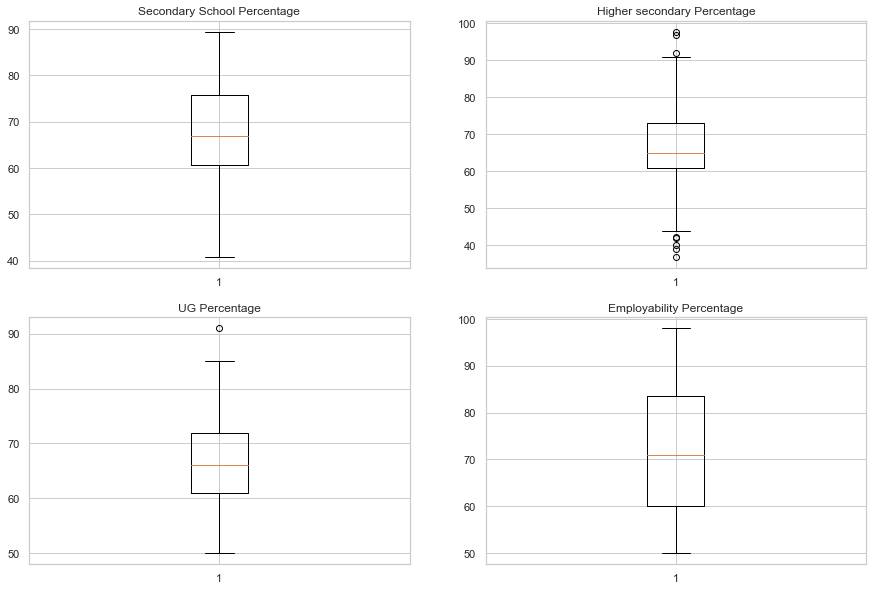

In [111]:
plt.figure(figsize = (15,10))

ax = plt.subplot(221)
plt.boxplot(copy['ssc_p'])
ax.set_title('Secondary School Percentage')

ax = plt.subplot(222)
plt.boxplot(copy['hsc_p'])
ax.set_title('Higher secondary Percentage')

ax = plt.subplot(223)
plt.boxplot(copy['degree_p'])
ax.set_title('UG Percentage')

ax = plt.subplot(224)
plt.boxplot(copy['etest_p'])
ax.set_title('Employability Percentage')

In [112]:
Q1 = copy['hsc_p'].quantile(0.25)
Q3 = copy['hsc_p'].quantile(0.75)
IQR = Q3 - Q1

filter = (copy['hsc_p'] >= Q1 - 1.5 * IQR) & (copy['hsc_p']<= Q3+ 1.5*IQR)
filtered= copy.loc[filter]

{'whiskers': [<matplotlib.lines.Line2D at 0x2680c3ecbb0>,
 'caps': [<matplotlib.lines.Line2D at 0x268117b9a80>,
 'boxes': [<matplotlib.lines.Line2D at 0x2680ef5ac50>],
 'medians': [<matplotlib.lines.Line2D at 0x268117ba020>],
 'fliers': [<matplotlib.lines.Line2D at 0x268117ba2f0>],
 'means': []}

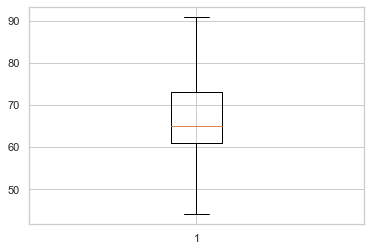

In [113]:
plt.boxplot(filtered['hsc_p'])

# DATA VISUALIZATION

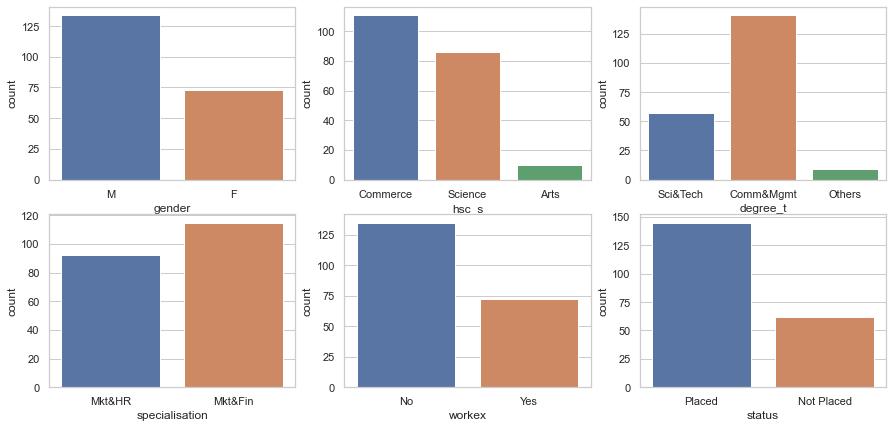

In [114]:
plt.figure(figsize = (15,7))

plt.subplot(231)
ax = sns.countplot(x= 'gender' , data = filtered)

plt.subplot(232)
ax = sns.countplot(x= 'hsc_s' , data = filtered )

plt.subplot(233)
ax = sns.countplot(x= 'degree_t' , data = filtered)

plt.subplot(234)
ax = sns.countplot(x= 'specialisation' , data = filtered)

plt.subplot(235)
ax = sns.countplot(x= 'workex' , data = filtered )

plt.subplot(236)
ax = sns.countplot(x= 'status' , data = filtered)

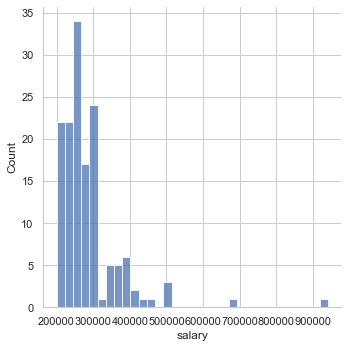

In [115]:
placed = filtered[filtered.salary!= 0]
sns.displot(placed['salary'])

In [116]:
import plotly_express as px
px.violin(placed,y="salary",x="specialisation",color="gender",box=True,points="all")

# ENCODING


In [117]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

object_cols= ['gender','workex','specialisation','status']

label_encoder = LabelEncoder()

for col in object_cols:
    filtered[col]= label_encoder.fit_transform(filtered[col])
    
filtered.head(10)

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,91.00,Commerce,58.00,Sci&Tech,0,55.00,1,58.80,1,270000.0
1,1,79.33,78.33,Science,77.48,Sci&Tech,1,86.50,0,66.28,1,200000.0
2,1,65.00,68.00,Arts,64.00,Comm&Mgmt,0,75.00,0,57.80,1,250000.0
3,1,56.00,52.00,Science,52.00,Sci&Tech,0,66.00,1,59.43,0,0.0
4,1,85.80,73.60,Commerce,73.30,Comm&Mgmt,0,96.80,0,55.50,1,425000.0
5,1,55.00,49.80,Science,67.25,Sci&Tech,1,55.00,0,51.58,0,0.0
6,0,46.00,49.20,Commerce,79.00,Comm&Mgmt,0,74.28,0,53.29,0,0.0
7,1,82.00,64.00,Science,66.00,Sci&Tech,1,67.00,0,62.14,1,252000.0
8,1,73.00,79.00,Commerce,72.00,Comm&Mgmt,0,91.34,0,61.29,1,231000.0
9,1,58.00,70.00,Commerce,61.00,Comm&Mgmt,0,54.00,0,52.21,0,0.0


In [118]:
# One Hot Encoding 
dummy_hsc_s = pd.get_dummies(filtered['hsc_s'], prefix = 'dummy')
dummy_degree_t = pd.get_dummies(filtered['degree_t'], prefix = 'dummy')
coded = pd.concat([filtered , dummy_hsc_s , dummy_degree_t],axis = 1)
coded.drop(['hsc_s','degree_t','salary'],axis = 1 , inplace = True)
coded.head()

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status,dummy_Arts,dummy_Commerce,dummy_Science,dummy_Comm&Mgmt,dummy_Others,dummy_Sci&Tech
0,1,67.00,91.00,58.00,0,55.0,1,58.80,1,0,1,0,0,0,1
1,1,79.33,78.33,77.48,1,86.5,0,66.28,1,0,0,1,0,0,1
2,1,65.00,68.00,64.00,0,75.0,0,57.80,1,1,0,0,1,0,0
3,1,56.00,52.00,52.00,0,66.0,1,59.43,0,0,0,1,0,0,1
4,1,85.80,73.60,73.30,0,96.8,0,55.50,1,0,1,0,1,0,0


# Splitting Data


In [119]:
X = coded.drop(['status'],axis=1)
y = coded.status

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y , train_size = 0.8 , random_state = 1)

# Classification Models

# LOGISTIC REGRESSION


In [121]:
#Logistic Regression - 
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from sklearn.model_selection import GridSearchCV
logreg = LogisticRegression()
parameter={'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,40,50],'max_iter':[100,200,300]}


logreg2 =GridSearchCV(logreg,param_grid=parameter,scoring='accuracy',cv=5)
logreg2.fit(X_train , y_train)



GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [122]:
print(logreg2.best_params_)

{'C': 1, 'max_iter': 300, 'penalty': 'l2'}


In [123]:
print(logreg2.best_score_)

0.890909090909091


In [124]:
#Prediction
y_pred1 = logreg2.predict(X_test)
print(y_pred1)

[1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1
 1 1 1 0 0]


In [125]:
#accuracy score
from sklearn.metrics import accuracy_score,classification_report
score1=accuracy_score(y_pred1,y_test)
print(score)

0.8333333333333334


In [126]:
print(classification_report(y_pred1,y_test))

              precision    recall  f1-score   support

           0       0.60      0.90      0.72        10
           1       0.96      0.81      0.88        32

    accuracy                           0.83        42
   macro avg       0.78      0.86      0.80        42
weighted avg       0.88      0.83      0.84        42



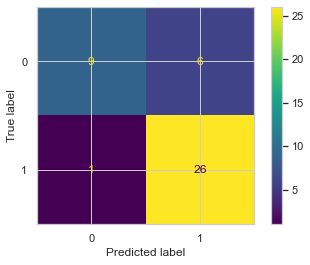

In [127]:
import matplotlib.pyplot as plt

from sklearn.metrics import plot_confusion_matrix


plot_confusion_matrix(logreg2, X_test, y_test)  
plt.show()

#  Decision Tree Classifier

In [128]:

from sklearn.tree import DecisionTreeClassifier 

dt = DecisionTreeClassifier(criterion = 'gini' , max_depth = 3)

dt = dt.fit(X_train , y_train)
y_pred2 = dt.predict(X_test)
score2 = accuracy_score(y_pred2,y_test)
print("Accuracy", metrics.accuracy_score(y_test , y_pred2))
print(score2)

Accuracy 0.7380952380952381
0.7380952380952381


In [129]:
print(classification_report(y_pred2,y_test))

              precision    recall  f1-score   support

           0       0.27      1.00      0.42         4
           1       1.00      0.71      0.83        38

    accuracy                           0.74        42
   macro avg       0.63      0.86      0.63        42
weighted avg       0.93      0.74      0.79        42



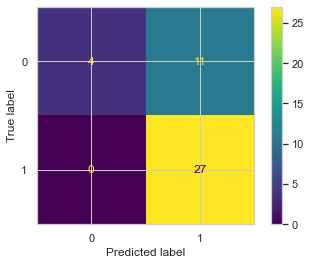

In [130]:
plot_confusion_matrix(dt, X_test, y_test)  
plt.show()

# Random Forest Classifier

In [131]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rt = RandomForestClassifier(n_estimators = 100)

rt.fit(X_train , y_train)
y_pred3 = rt.predict(X_test)
score3 = accuracy_score(y_pred3,y_test)
print("Accuracy", metrics.accuracy_score(y_test , y_pred3))
print(score3)
 

Accuracy 0.8095238095238095
0.8095238095238095


In [132]:
print(classification_report(y_pred3,y_test))

              precision    recall  f1-score   support

           0       0.47      1.00      0.64         7
           1       1.00      0.77      0.87        35

    accuracy                           0.81        42
   macro avg       0.73      0.89      0.75        42
weighted avg       0.91      0.81      0.83        42



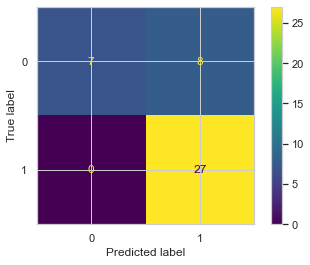

In [133]:
plot_confusion_matrix(rt, X_test, y_test)  
plt.show()

# ANALYSIS OF MODEL PERFORMANCE

Logistic Regression


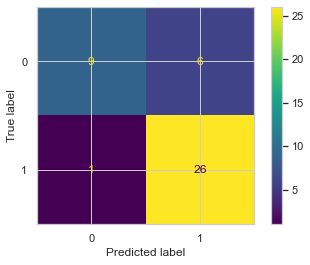

Decision tree


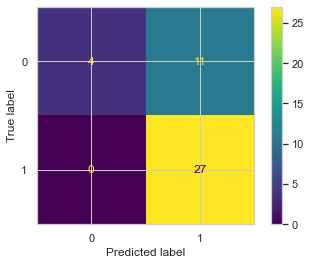

Random Forest Classifier


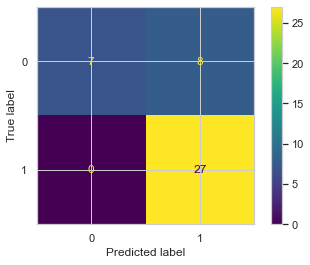

In [134]:
#Confusion Matrix 
import matplotlib.pyplot as plt

from sklearn.metrics import plot_confusion_matrix

print("Logistic Regression")
plot_confusion_matrix(logreg2, X_test, y_test)  
plt.show()
print("Decision tree")
plot_confusion_matrix(dt, X_test, y_test)  
plt.show()
print("Random Forest Classifier")
plot_confusion_matrix(rt, X_test, y_test)  
plt.show()


#  Bar plot of model performance

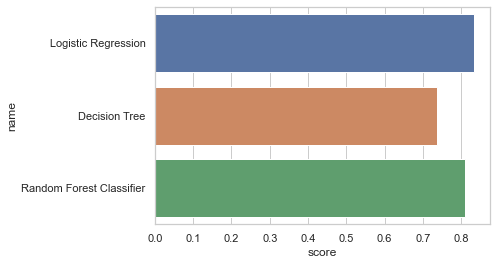

In [136]:
scores = [score1,score2,score3]
names = ["Logistic Regression","Decision Tree","Random Forest Classifier"]
df = pd.DataFrame()
df['name'] = names
df['score'] = scores


sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=df)